# MNIST - NN - PyTorch

In [7]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import helper
%matplotlib inline

In [54]:
def get_accuracy(predicted, target):
    correct = sum(p == y for p, y in zip(predicted.max(1)[1], target))
    return correct.item()/predicted.shape[0], correct.item(), predicted.shape[0]

## Сургалтын өгөгдөл унших

In [9]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1,)),])

trainset = datasets.MNIST('.', download=False, train=True, transform=transform)
testset = datasets.MNIST('.', download=False, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=150, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)
print('Сургах өгөгдөл:', len(trainset))
print('Шалгах өгөгдөл:', len(testset))
print('Batch тоо:', len(trainloader))
batch_count = len(trainloader)

Сургах өгөгдөл: 60000
Шалгах өгөгдөл: 10000
Batch тоо: 400


## Давхаргуудын хэмжээ

In [10]:
input_size = 784
hidden_sizes = [150]
output_size = 10

## Модель

Input -> Hidden 1 -> ReLU -> Output -> Softmax

Loss: Negative Log Likelihood Loss

Optimizer: Stochastic Gradient Descend

In [48]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.09)

## Сургах

In [49]:
# Epoch
epochs = 30

for e in range(1, epochs + 1):
    batch_n = 1
    epoch_loss = 0
    epoch_accuracy = 0
    print('Epoch:', e, '/', epochs)
    # Batch
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_accuracy += get_accuracy(output, labels)
        
        helper.print_progress(batch_n, batch_count, loss=epoch_loss/batch_n, accuracy=epoch_accuracy/batch_n * 100)
        batch_n += 1
    else:
        print('')
#         print('Training loss:', epoch_loss/len(trainloader))

Epoch: 1 / 30
[============================================================] 100.0% 400/400 loss: 0.64952 accuracy: 83.91333%Training loss: 0.6495176792517304
Epoch: 2 / 30
[============================================================] 100.0% 400/400 loss: 0.31657 accuracy: 91.02833%Training loss: 0.3165702513232827
Epoch: 3 / 30
[============================================================] 100.0% 400/400 loss: 0.26842 accuracy: 92.33833%Training loss: 0.26841717809438703
Epoch: 4 / 30
[============================================================] 100.0% 400/400 loss: 0.23379 accuracy: 93.36833%Training loss: 0.2337888747267425
Epoch: 5 / 30
[============================================================] 100.0% 400/400 loss: 0.20618 accuracy: 94.23667%Training loss: 0.20618370056152344
Epoch: 6 / 30
[============================================================] 100.0% 400/400 loss: 0.18407 accuracy: 94.84833%Training loss: 0.18406963039189578
Epoch: 7 / 30
[============================

## Шалгах

tensor(2)
tensor(2)


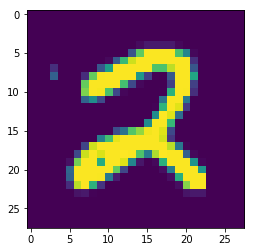

In [90]:
images, labels = next(iter(testloader))

img = images[0]
img_v = img.view(1, 784)

with torch.no_grad():
    logits = model.forward(img_v)

plt.imshow(img[0])
print(logits[0].max(0)[1])
print(labels[0])

In [93]:
correct = 0
for image, label in testloader:
    img_v = image.view(1, 784)
    with torch.no_grad():
        out = model.forward(img_v)
#         print(out, out.max(1)[1], label)
        correct += 1 if out.max(1)[1] == label else 0

In [98]:
print(f'{correct/len(testloader) * 100}% - {correct}/{len(testloader)}')

97.68% - 9768/10000
